In [1]:
import tensorflow as tf

tf.__version__

'2.2.0-rc4'

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
def metrics(y_test, y_pred):
    y_pred = y_pred.argmax(axis=1)
    print(y_pred)
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("Precision Score : ", precision_score(y_test, y_pred, average="weighted"))
    print("Classification Report : \n", classification_report(y_test, y_pred))
    print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

In [3]:
import pandas as pd
import numpy as np

<hr>

## Load the data

<hr>

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Always a good idea to look at shape before getting started.
print(f"X train shape : {X_train.shape}")
print(f"y train shape : {y_train.shape}")
print(f"X test shape : {X_test.shape}")
print(f"y test shape : {y_test.shape}")

X train shape : (60000, 28, 28)
y train shape : (60000,)
X test shape : (10000, 28, 28)
y test shape : (10000,)


##### Now, if we see training set contains 60000 samples. 
##### Testing set has 10000. 
##### As shape of each image is 28 * 28 pixels (picture element) --> can be interpreted as grayscale as no color layer is specified.

##### In grayscale 255 --> white , 0 --> black and any other value --> shade of grey.

In [5]:
# All of the above are numpy arrays --> run much faster than python lists.
# numpy is implemented in C.

# tensorflow is named after "tensor" which is a generalised numpy array.

print(type(X_train))

<class 'numpy.ndarray'>


In [6]:
# Normalising values as gradient descent works better on small scale data.

X_train , X_test = X_train/255, X_test/255

<hr>

## Instantiate the model

<hr>

In [7]:
X_train[0].shape

(28, 28)

In [8]:
len(set(y_train))

10

In [9]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model

input_shape = X_train[0].shape
hidden_units = 128
K = len(set(y_train))


i = Input(shape=input_shape)
x = SimpleRNN(hidden_units)(i)
x = Dense(K, activation="softmax")(x)

rnn_model = Model(i,x)

In [10]:
from tensorflow.keras.layers import Input, GRU, Dense
from tensorflow.keras.models import Model

input_shape = X_train[0].shape
hidden_units = 128
K = len(set(y_train))


i = Input(shape=input_shape)
x = GRU(hidden_units)(i)
x = Dense(K, activation="softmax")(x)

gru_model = Model(i,x)

In [11]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

input_shape = X_train[0].shape
hidden_units = 128
K = len(set(y_train))


i = Input(shape=input_shape)
x = LSTM(hidden_units)(i)
x = Dense(K, activation="softmax")(x)

lstm_model = Model(i,x)

In [12]:
import matplotlib.pyplot as plt
def compile_model(model):
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
    
    plt.figure(figsize=(20,20))
    plt.subplot(211)
    plt.plot(r.history["loss"], label="Loss")
    plt.plot(r.history["val_loss"], label="Val. Loss")
    plt.xlabel('No. of epochs')
    plt.ylabel("Loss")
    plt.legend()
    
    plt.subplot(212)
    plt.plot(r.history["accuracy"], label="Accuracy")
    plt.plot(r.history["val_accuracy"], label="Val. Accuracy")
    plt.xlabel('No. of epochs')
    plt.ylabel("Accuracy")
    plt.legend()
    
    y_pred = model.predict(X_test)
    metrics(y_test, y_pred)
    

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6817 - accuracy: 0.7537 - val_loss: 0.5580 - val_accuracy: 0.8000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5650 - accuracy: 0.7989 - val_loss: 0.6136 - val_accuracy: 0.7858
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5227 - accuracy: 0.8126 - val_loss: 0.4793 - val_accuracy: 0.8324
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4825 - accuracy: 0.8281 - val_loss: 0.5126 - val_accuracy: 0.8202
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5007 - accuracy: 0.8223 - val_loss: 0.6696 - val_accuracy: 0.7742
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4922 - accuracy: 0.8254 - val_loss: 0.4874 - val_accuracy: 0.8260
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4701 - accuracy: 0.8317 - val_loss: 0.4845 - val_accuracy:

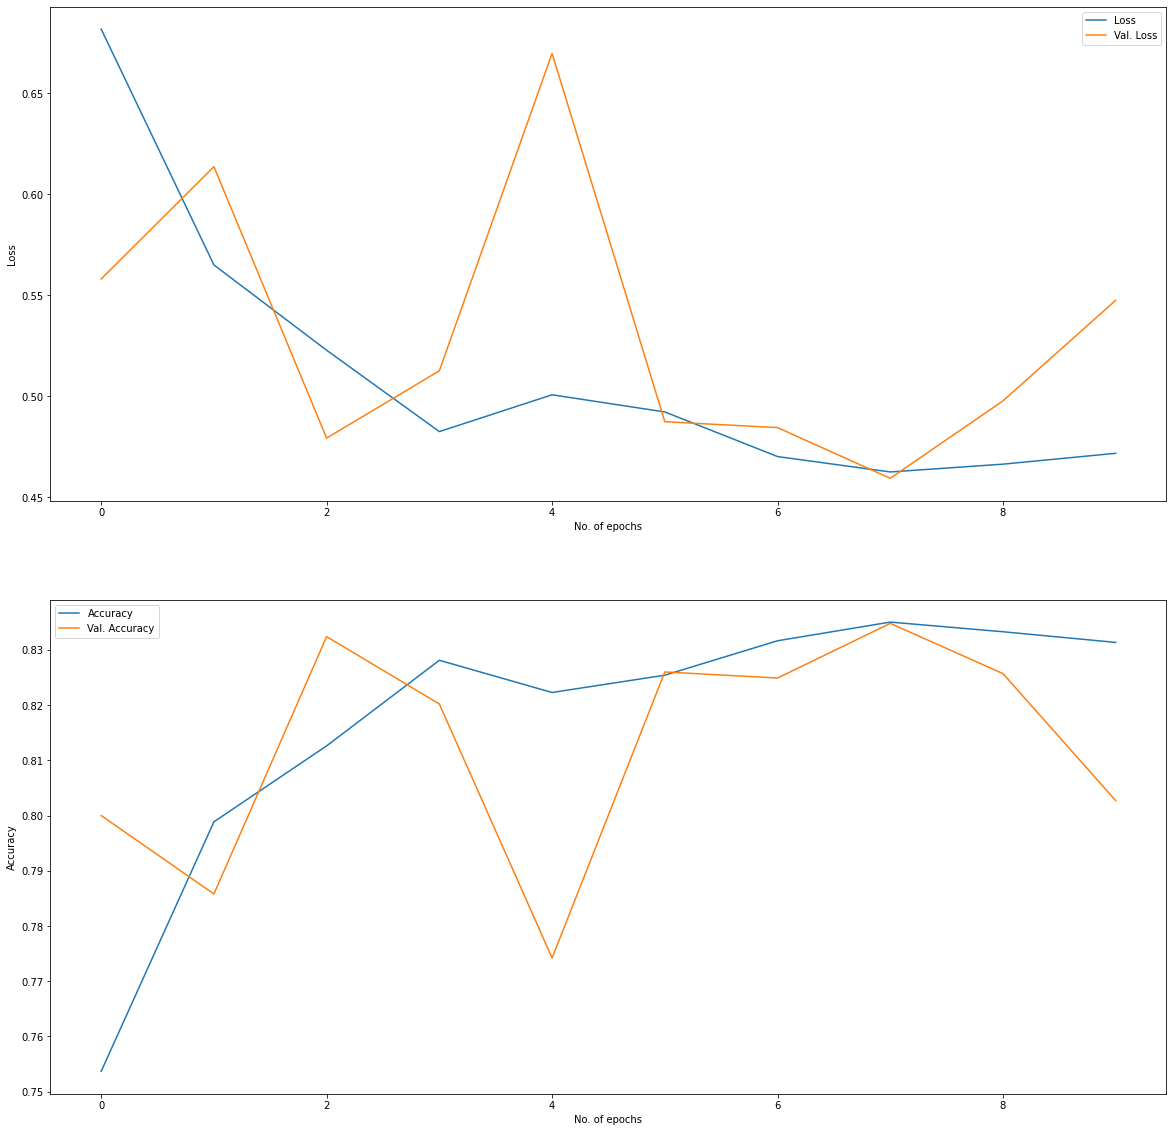

In [13]:
compile_model(rnn_model)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5886 - accuracy: 0.7862 - val_loss: 0.4338 - val_accuracy: 0.8420
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3890 - accuracy: 0.8579 - val_loss: 0.3844 - val_accuracy: 0.8547
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3399 - accuracy: 0.8741 - val_loss: 0.3551 - val_accuracy: 0.8694
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3101 - accuracy: 0.8850 - val_loss: 0.3186 - val_accuracy: 0.8827
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2864 - accuracy: 0.8932 - val_loss: 0.3107 - val_accuracy: 0.8885
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2702 - accuracy: 0.8989 - val_loss: 0.3126 - val_accuracy: 0.8874
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2557 - accuracy: 0.9041 - val_loss: 0.3093 - val_a

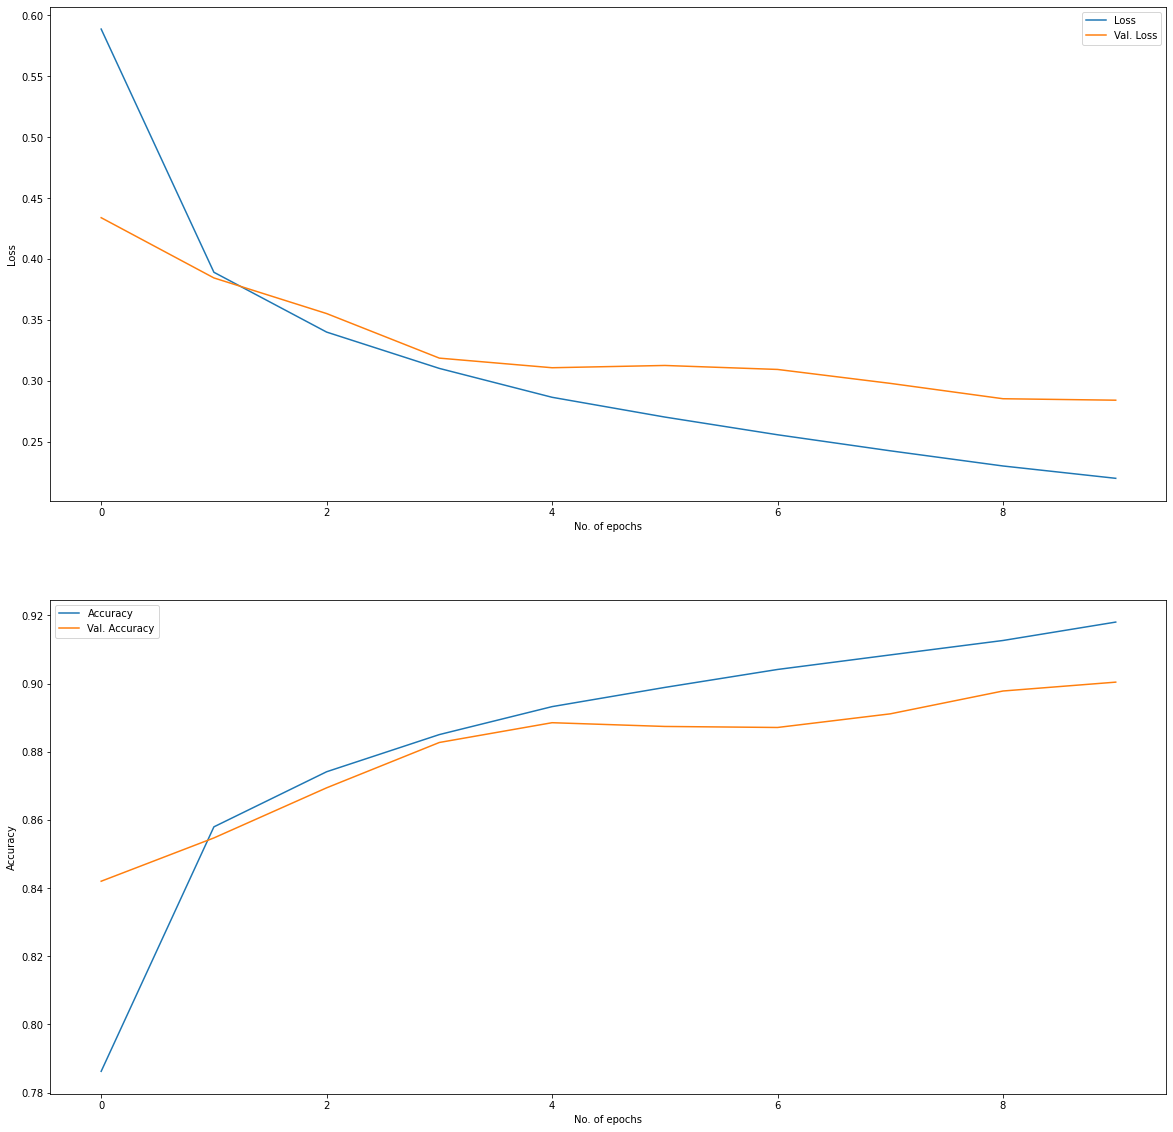

In [14]:
compile_model(gru_model)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5722 - accuracy: 0.7904 - val_loss: 0.4559 - val_accuracy: 0.8330
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3992 - accuracy: 0.8512 - val_loss: 0.3904 - val_accuracy: 0.8570
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3510 - accuracy: 0.8702 - val_loss: 0.3765 - val_accuracy: 0.8618
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3255 - accuracy: 0.8780 - val_loss: 0.3508 - val_accuracy: 0.8695
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3021 - accuracy: 0.8874 - val_loss: 0.3419 - val_accuracy: 0.8714
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2843 - accuracy: 0.8938 - val_loss: 0.3190 - val_accuracy: 0.8820
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2707 - accuracy: 0.8992 - val_loss: 0.2988 -

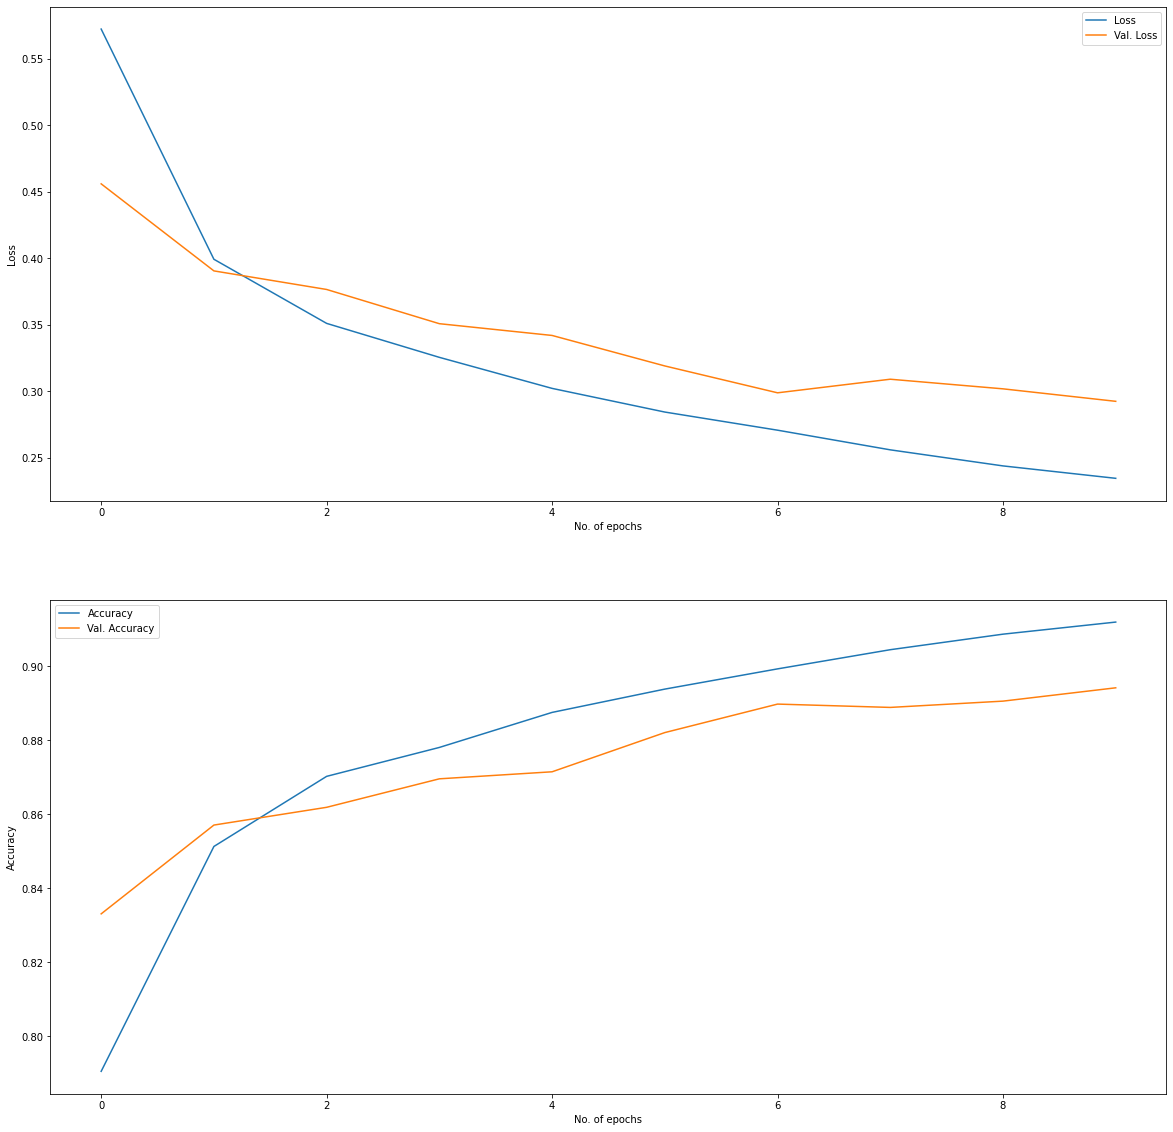

In [15]:
compile_model(lstm_model)